# COM-480 Data Visualization
## Project Milestone 2
### Preparation of the data for the statistical plot
Statistical results of comparing each features with CO2 emissions (mean of result by country through time) - bar plot with clic on one bar shows detail for all countries
-> Pearson test if we assume the data is fit for statistical tests, Spearman test otherwise

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [6]:
data = pd.read_pickle("./milestone1/data_final.pkl")
data.head(1)

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,...,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.228792e+09,NaN,1340995.0,NaN


In [49]:
# Do a SpearmanR computation for all country for all features: 
countries = data.country.unique()
features = data.columns
res = pd.DataFrame(columns=features, index = countries)

In [50]:
res

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,...,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
for country in countries: 
    for feat in features: 
        n = len(feat_dist)-5
        feat_dist = data[data.country==country][f'{feat}']
        co2_dist = data[data.country==country]['greenhousegas_emissione_mtco2equivalent']
        if feat_dist.isna().sum() < n or feat_dist.isna().sum() < n:
            r = stats.spearmanr(feat_dist, co2_dist, nan_policy='omit').correlation
            print(r)
            res.loc[f'{country}', f'{feat}'] = r

1.0
-0.2270676691729323
nan
nan
nan
1.0
-1.0
-1.0
1.0
-1.0
nan
1.0
1.0
0.0
0.9285714285714286
-0.14736842105263157
nan
nan
nan
1.0
0.7380952380952381
0.7142857142857143
0.2619047619047619
0.9285714285714286
0.19047619047619047
-0.29940656547831473
nan
0.9285714285714286
0.5952380952380952


/home/julia/.local/lib/python3.8/site-packages/scipy/stats/_mstats_basic.py:639: RuntimeWarning: invalid value encountered in true_divide
  t = rs * np.sqrt((dof / ((rs+1.0) * (1.0-rs))).clip(0))
/home/julia/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


ValueError: The input must have at least 3 entries!

In [66]:
res

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,...,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 25 artists>

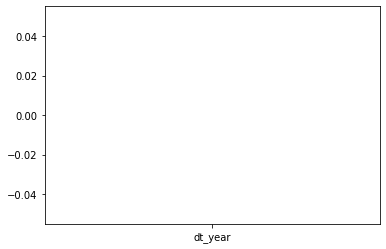

In [47]:
# Plots for each features
res_feats = res.mean(axis=0)
plt.bar(res_feats.index, res_feats)

<BarContainer object of 25 artists>

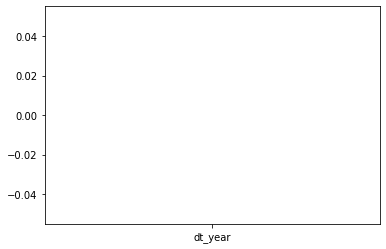

In [41]:
# Example of one plot for one country
plt.bar(res.columns, res[res.index == 'Switzerland'].values[0])